# Data Understanding – Sales Performance Dataset

This notebook focuses on understanding the structure, quality, and meaning of the sales data.
The goal is to build confidence in the dataset before performing deeper analysis.



In [1]:
import pandas as pd
import numpy as np

In [2]:
DATA_PATH = "../data/raw/skygeni_sales_data.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost


In [3]:
df.shape

(5000, 12)

## Dataset Overview

Each row in the dataset represents a single sales deal.
The dataset captures the full lifecycle of a deal, from creation to closure, along with sales ownership and deal characteristics.

Understanding the size and structure of the data helps assess whether it is sufficient for meaningful analysis.


In [4]:
df.columns

Index(['deal_id', 'created_date', 'closed_date', 'sales_rep_id', 'industry',
       'region', 'product_type', 'lead_source', 'deal_stage', 'deal_amount',
       'sales_cycle_days', 'outcome'],
      dtype='str')

## Column Definitions

- **deal_id**: Unique identifier for each sales opportunity
- **created_date**: Date when the deal entered the pipeline
- **closed_date**: Date when the deal was closed (won or lost)
- **sales_rep_id**: Sales representative responsible for the deal
- **industry**: Industry of the customer
- **region**: Geographic region
- **product_type**: Product being sold
- **lead_source**: Origin of the lead (Inbound, Partner, etc.)
- **deal_stage**: Stage of the deal in the sales funnel
- **deal_amount**: Potential revenue from the deal
- **sales_cycle_days**: Days taken to close the deal
- **outcome**: Final status of the deal (Won / Lost)


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   deal_id           5000 non-null   str  
 1   created_date      5000 non-null   str  
 2   closed_date       5000 non-null   str  
 3   sales_rep_id      5000 non-null   str  
 4   industry          5000 non-null   str  
 5   region            5000 non-null   str  
 6   product_type      5000 non-null   str  
 7   lead_source       5000 non-null   str  
 8   deal_stage        5000 non-null   str  
 9   deal_amount       5000 non-null   int64
 10  sales_cycle_days  5000 non-null   int64
 11  outcome           5000 non-null   str  
dtypes: int64(2), str(10)
memory usage: 468.9 KB


In [6]:
df.isna().sum()


deal_id             0
created_date        0
closed_date         0
sales_rep_id        0
industry            0
region              0
product_type        0
lead_source         0
deal_stage          0
deal_amount         0
sales_cycle_days    0
outcome             0
dtype: int64

In [7]:
df["created_date"] = pd.to_datetime(df["created_date"])
df["closed_date"] = pd.to_datetime(df["closed_date"], errors="coerce")


In [11]:
df[["created_date", "closed_date"]].describe()

,created_date,closed_date
count,5000,5000
mean,2023-08-14 06:10:56.640000,2023-10-17 00:13:32.160000
min,2023-01-01 00:00:00,2023-01-11 00:00:00
25%,2023-04-22 00:00:00,2023-06-26 00:00:00
50%,2023-08-14 00:00:00,2023-10-15 00:00:00
75%,2023-12-06 00:00:00,2024-02-08 00:00:00
max,2024-03-26 00:00:00,2024-07-20 00:00:00


In [9]:
df[["deal_amount", "sales_cycle_days"]].describe()

,deal_amount,sales_cycle_days
count,5000.000000,5000.000000
mean,26286.492800,63.751800
std,27689.230136,32.731405
min,2002.000000,7.000000
25%,6611.000000,35.750000
50%,14171.500000,64.000000
75%,39062.250000,92.000000
max,100000.000000,120.000000


In [10]:
categorical_cols = [
    "industry", "region", "product_type",
    "lead_source", "deal_stage", "outcome"
]

for col in categorical_cols:
    print(f"\n{col.upper()}")
    print(df[col].value_counts())


INDUSTRY
industry
Ecommerce     1060
HealthTech    1010
SaaS          1001
EdTech         992
FinTech        937
Name: count, dtype: int64

REGION
region
India            1286
APAC             1242
North America    1239
Europe           1233
Name: count, dtype: int64

PRODUCT_TYPE
product_type
Core          1694
Pro           1676
Enterprise    1630
Name: count, dtype: int64

LEAD_SOURCE
lead_source
Inbound     1262
Referral    1252
Outbound    1246
Partner     1240
Name: count, dtype: int64

DEAL_STAGE
deal_stage
Demo           1043
Proposal       1009
Closed          997
Negotiation     995
Qualified       956
Name: count, dtype: int64

OUTCOME
outcome
Lost    2737
Won     2263
Name: count, dtype: int64


## Initial Observations

- The dataset covers a diverse set of industries, regions, and lead sources.
- Deal stages span the full sales funnel, enabling funnel analysis.
- Deal amounts and sales cycles vary significantly, suggesting differences in deal complexity.

Overall, the dataset is sufficiently rich to analyze win rate behavior, pipeline health, and revenue risk.


## Key Takeaway for Sales Leadership

The data provides a comprehensive view of the sales pipeline and deal outcomes.
It is suitable for diagnosing conversion issues, identifying risk factors, and supporting data-driven sales decisions.


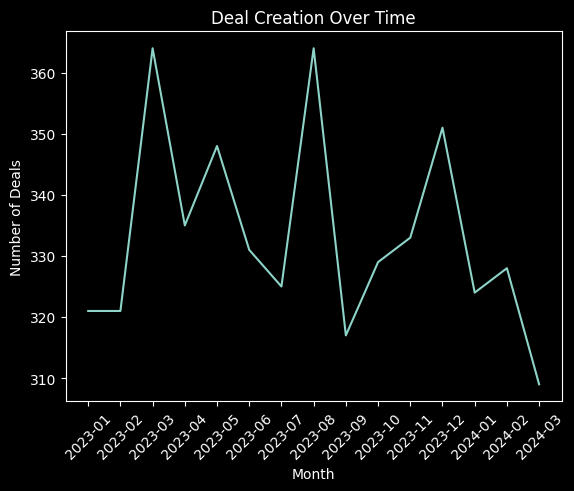

In [12]:
import matplotlib.pyplot as plt

deals_by_month = (
    df.groupby(df["created_date"].dt.to_period("M"))
      .size()
      .reset_index(name="deals")
)

plt.figure()
plt.plot(deals_by_month["created_date"].astype(str), deals_by_month["deals"])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Deals")
plt.title("Deal Creation Over Time")
plt.show()

### Observation

Deal creation is spread across the timeline without major gaps.
This confirms that time-based analysis such as quarterly win-rate trends is reliable.


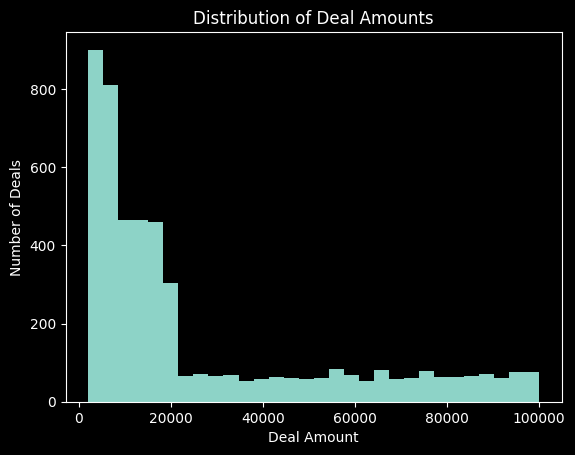

In [13]:
plt.figure()
plt.hist(df["deal_amount"], bins=30)
plt.xlabel("Deal Amount")
plt.ylabel("Number of Deals")
plt.title("Distribution of Deal Amounts")
plt.show()


### Observation

Deal amounts show natural variation, indicating a mix of small and large opportunities.
This supports segment-level and revenue-weighted analysis later in the workflow.


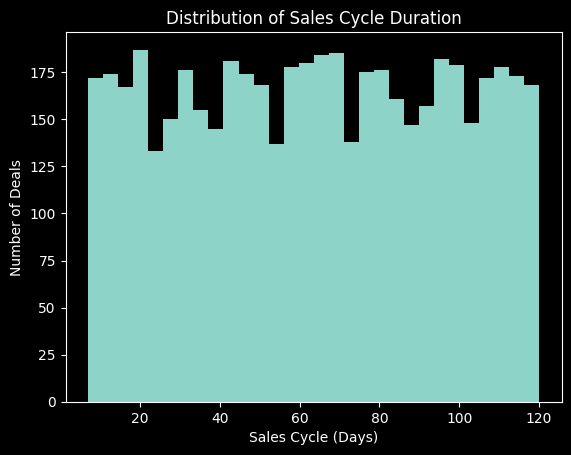

In [14]:
plt.figure()
plt.hist(df["sales_cycle_days"], bins=30)
plt.xlabel("Sales Cycle (Days)")
plt.ylabel("Number of Deals")
plt.title("Distribution of Sales Cycle Duration")
plt.show()


### Observation

Sales cycle durations vary across deals, suggesting differences in deal complexity.
This validates the use of time-based risk signals in later analysis.


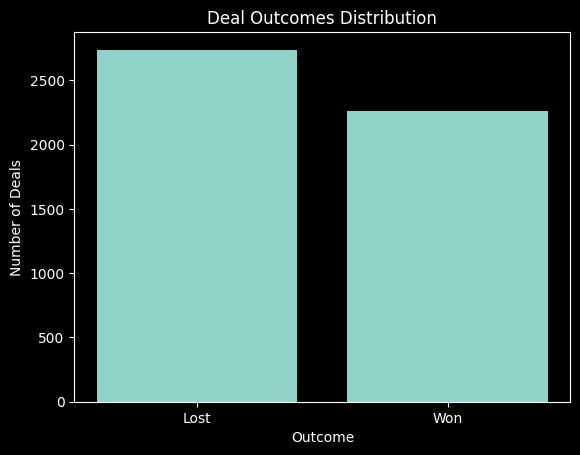

In [15]:
outcome_counts = df["outcome"].value_counts()

plt.figure()
plt.bar(outcome_counts.index, outcome_counts.values)
plt.xlabel("Outcome")
plt.ylabel("Number of Deals")
plt.title("Deal Outcomes Distribution")
plt.show()


### Observation

The dataset contains a balanced mix of won and lost deals.
This ensures that win rate analysis is statistically meaningful.


## Summary

Initial visual checks confirm that the dataset is complete, well-distributed across time,
and contains realistic deal sizes and sales cycles.

The data is suitable for deeper exploratory analysis focused on win rate behavior,
pipeline efficiency, and revenue risk.
